In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import gdown
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Use gdown to download the file from Google Drive
file_id = '1dp71J_aYqtn7KfZPWFFqF6WJPfyph_1d'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'cleaned_data.csv'

gdown.download(url, output, quiet=False)

# Load the dataset (assuming it’s a CSV file)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1dp71J_aYqtn7KfZPWFFqF6WJPfyph_1d
To: /content/cleaned_data.csv
100%|██████████| 334k/334k [00:00<00:00, 53.7MB/s]


In [ ]:
# Explore data
print("Data Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5000 non-null   int64  
 1   date                5000 non-null   object 
 2   steps               5000 non-null   int64  
 3   calories_burned     5000 non-null   float64
 4   distance_km         5000 non-null   float64
 5   active_minutes      5000 non-null   int64  
 6   sleep_hours         5000 non-null   float64
 7   heart_rate_avg      5000 non-null   int64  
 8   workout_type        5000 non-null   object 
 9   weather_conditions  5000 non-null   object 
 10  location            5000 non-null   object 
 11  mood                5000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 468.9+ KB
None

First few rows:
   user_id        date  steps  calories_burned  distance_km  active_minutes  \
0       27  2023-05-24   1405  

In [ ]:
# Find unique categories in the 'mood' column
print("\nMood Categories:")
print(data['mood'].value_counts())


Mood Categories:
mood
Neutral     1789
Stressed    1379
Happy       1105
Tired        727
Name: count, dtype: int64


In [ ]:
# Standardize numerical features for clustering
numerical_features = data[['steps', 'calories_burned', 'distance_km', 'active_minutes',
                           'sleep_hours', 'heart_rate_avg']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

In [ ]:
# Apply K-means clustering and visualize with PCA
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

In [ ]:
# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

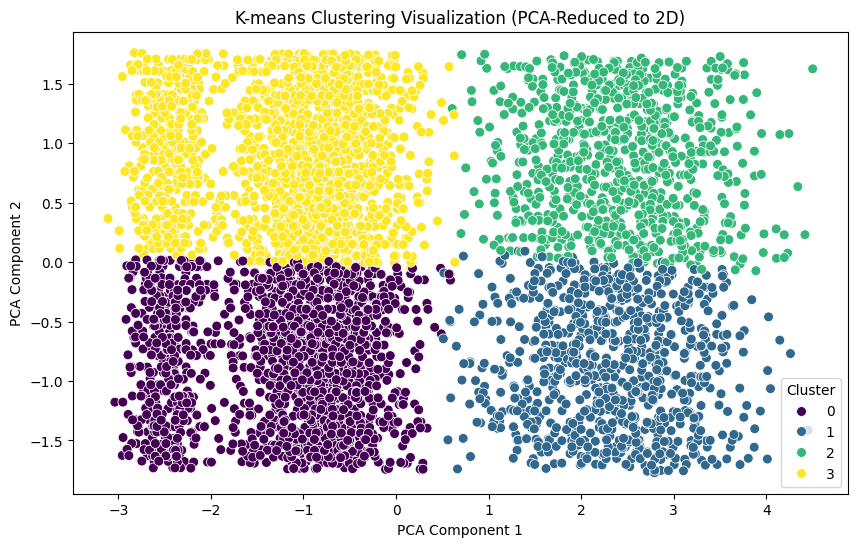

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette="viridis", s=50)
plt.title("K-means Clustering Visualization (PCA-Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Step 7: Feature Engineering and Accuracy Evaluation
X = data[['steps', 'calories_burned', 'distance_km', 'active_minutes',
          'sleep_hours', 'heart_rate_avg']]
y = data['mood']

feature_subsets = {
    "Activity & Heart": ['steps', 'active_minutes', 'heart_rate_avg'],
    "Calories & Distance": ['calories_burned', 'distance_km'],
    "Sleep & Activity": ['sleep_hours', 'active_minutes', 'steps']
}

accuracy_results = {}

for subset_name, features in feature_subsets.items():
    X_subset = X[features]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)

    # Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[subset_name] = accuracy

print("\nAccuracy Results for Feature Subsets:")
print(accuracy_results)



Accuracy Results for Feature Subsets:
{'Activity & Heart': 0.284, 'Calories & Distance': 0.2826666666666667, 'Sleep & Activity': 0.6213333333333333}


In [ ]:
# Apply PCA on the entire dataset for dimensionality reduction
pca_full = PCA(n_components=2)  # Change n_components to desired number for analysis
pca_data = pca_full.fit_transform(scaled_features)

In [ ]:
# Explained variance by each principal component
print("\nExplained Variance Ratio by each PCA component:")
print(pca_full.explained_variance_ratio_)


Explained Variance Ratio by each PCA component:
[0.58120741 0.1666721 ]
